In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import seaborn as sns

**1. Primer acercamiento a la base de datos**

In [2]:
df = pd.read_csv("DFC_FACILITY.csv", header=0)
df.columns = [c.lower() for c in df.columns.tolist()]
pd.set_option("display.max_columns", None)
display(df.shape)

(7748, 118)

In [3]:
display(df.columns.tolist())

['provider number',
 'network',
 'facility name',
 'five star date',
 'five star',
 'five star data availability code',
 'address line 1',
 'address line 2',
 'city',
 'state',
 'zip',
 'county',
 'phone number',
 'profit or non-profit',
 'chain owned',
 'chain organization',
 'late shift',
 '# of dialysis stations',
 'offers in-center hemodialysis',
 'offers peritoneal dialysis',
 'offers home hemodialysis training',
 'certification or recertification date',
 'claims date',
 'crownweb date',
 'strr date',
 'percentage of medicare patients with hgb<10 g/dl',
 'hgb<10 data availability code',
 'percentage of medicare patients with hgb>12 g/dl',
 'hgb > 12 data availability code',
 'number of dialysis patients with hgb data',
 'patient transfusion data availability code',
 'patient transfusion category text',
 'number of patients included in the transfusion summary',
 'percent of adult hd patients with kt/v >= 1.2',
 'adult hd kt/v data availability code',
 'percentage of adult pd pts wi

In [4]:
df['patient hospitalization category text'].unique() # .info()

array(['As Expected', 'Better than Expected', 'Worse than Expected',
       'Not Available', nan], dtype=object)

In [5]:
def analiza_columnas(df, n, indice=0):
    rango = range(n, len(df.columns), n)
    j=0
    for i in rango:
        display(df.iloc[[indice], j:i])
        j=i
    display(df.iloc[[indice], j:len(df)-j])
        
# analiza_columnas(df, 10)

In [6]:
df = df.drop(columns=["city", "county", "provider number", "network", "chain owned", "chain organization", "facility name","five star date", 
                      "address line 1",	"address line 2", "phone number", "zip", "claims date", "crownweb date", 
                      "strr date", "shr date", "srr date", "smr date", "sir date", "swr date"])
df = df.drop(columns=df.columns[df.columns.to_series().str.contains("data availability")==True].tolist())

# analiza_columnas(df, 10)

In [7]:
# df.describe()

In [8]:
data_availability_columns = df.columns[df.columns.to_series().str.contains("data availability")==True].tolist()
df_availability_code = df.loc[:, data_availability_columns].reset_index().drop(columns="index")
# analiza_columnas(df_availability_code, 5)

In [9]:
display(df_availability_code.apply(lambda x: x.unique()))

Series([], dtype: float64)

In [10]:
mascara = (df[data_availability_columns]==1.0)
# observaciones_eliminadas = len(df_availability_code)-len(df_availability_code[mascara].dropna(how="all"))
df_filtrado = df_availability_code[mascara] #.dropna(how="all")
#print(f"Se obtiene un dataframe de {len(df_filtrado)} observaciones.\nAl eliminar las filas con todos los valores=NaN, quedan "
#      f"{observaciones_eliminadas} filas menos.")
display(df_filtrado["five star"])

KeyError: 'five star'

In [ ]:
# analiza_columnas(df.loc[:, [c for c in df.columns if c not in data_availability_columns]], 10, 7747)

In [ ]:
# analiza_columnas(df.loc[:, [c for c in df.columns if c not in data_availability_columns]], 10, 0)

In [ ]:
#null_axis_1 = df.isna().sum(axis=1)/len(df.columns)
#null_axis_0 = df.isna().sum(axis=0)/len(df)
#display(null_axis_1[null_axis_1 > 0.85])
#display(null_axis_0[null_axis_0 > 0.85])
#display(len(porcentaje_nan(df=df_av_code_sin_full_nan, axis=False).columns.tolist()))
#display(len(porcentaje_nan(df=df_av_code_sin_full_nan, axis=True).columns.tolist()))
#display([c for c in df_av_code_sin_full_nan.columns.tolist() if c not in porcentaje_nan(df=df_av_code_sin_full_nan, axis=True).columns.tolist()])
#display(len([c for c in df_av_code_sin_full_nan.columns.tolist() if c not in porcentaje_nan(df=df_av_code_sin_full_nan, axis=True).columns.tolist()]))

In [ ]:
# Cuantos centros de dialisis tienen NaN como valor de rating
display(df["five star"].isna().sum())

1017

In [ ]:
display(df["five star"].dropna().unique())

array([3., 4., 5., 2., 1.])

In [ ]:
df_five_star = df.loc[df["five star"].dropna()].reset_index().drop(columns="index")
df_five_star = df_five_star.drop(columns=(data_availability_columns))
print(len(df_five_star))
display(df_five_star.head(10))
display(df_five_star.tail(10))

6731


,five star,state,profit or non-profit,late shift,# of dialysis stations,offers in-center hemodialysis,offers peritoneal dialysis,offers home hemodialysis training,certification or recertification date,percentage of medicare patients with hgb<10 g/dl,...,swr category text,95% c.i. (upper limit) for swr,95% c.i. (lower limit) for swr,number of patients in this facility for swr,standardized first kidney transplant waitlist ratio,pppw category text,95% c.i. (upper limit) for pppw,95% c.i. (lower limit) for pppw,number of patients for pppw,percentage of prevalent patients waitlisted
0,3.0,AL,Profit,No,23,Yes,Yes,No,10/21/1977,20.0,...,As Expected,1.38,0.10,56.0,0.47,As Expected,28.1,3.3,96.0,10.3
1,3.0,AL,Profit,No,18,Yes,Yes,Yes,12/14/1977,21.0,...,As Expected,2.39,0.01,28.0,0.43,As Expected,28.1,2.5,88.0,9.1
2,3.0,AL,Profit,No,23,Yes,Yes,No,10/21/1977,20.0,...,As Expected,1.38,0.10,56.0,0.47,As Expected,28.1,3.3,96.0,10.3
3,3.0,AL,Profit,No,23,Yes,Yes,No,10/21/1977,20.0,...,As Expected,1.38,0.10,56.0,0.47,As Expected,28.1,3.3,96.0,10.3
4,3.0,AL,Profit,No,23,Yes,Yes,No,10/21/1977,20.0,...,As Expected,1.38,0.10,56.0,0.47,As Expected,28.1,3.3,96.0,10.3
5,3.0,AL,Profit,No,27,Yes,Yes,Yes,11/28/1977,33.0,...,Not Available,NaN,NaN,34.0,NaN,As Expected,30.2,1.9,79.0,8.4
6,3.0,AL,Profit,No,23,Yes,Yes,No,10/21/1977,20.0,...,As Expected,1.38,0.10,56.0,0.47,As Expected,28.1,3.3,96.0,10.3
7,3.0,AL,Profit,No,23,Yes,Yes,No,10/21/1977,20.0,...,As Expected,1.38,0.10,56.0,0.47,As Expected,28.1,3.3,96.0,10.3
8,3.0,AL,Profit,No,18,Yes,Yes,Yes,12/14/1977,21.0,...,As Expected,2.39,0.01,28.0,0.43,As Expected,28.1,2.5,88.0,9.1
9,3.0,AL,Profit,No,27,Yes,Yes,Yes,11/28/1977,33.0,...,Not Available,NaN,NaN,34.0,NaN,As Expected,30.2,1.9,79.0,8.4


,five star,state,profit or non-profit,late shift,# of dialysis stations,offers in-center hemodialysis,offers peritoneal dialysis,offers home hemodialysis training,certification or recertification date,percentage of medicare patients with hgb<10 g/dl,...,swr category text,95% c.i. (upper limit) for swr,95% c.i. (lower limit) for swr,number of patients in this facility for swr,standardized first kidney transplant waitlist ratio,pppw category text,95% c.i. (upper limit) for pppw,95% c.i. (lower limit) for pppw,number of patients for pppw,percentage of prevalent patients waitlisted
6721,4.0,AL,Profit,No,24,Yes,No,No,9/1/1976,9.0,...,Not Available,NaN,NaN,15.0,NaN,As Expected,50.7,0.7,33.0,7.8
6722,3.0,AL,Profit,No,23,Yes,Yes,No,10/21/1977,20.0,...,As Expected,1.38,0.10,56.0,0.47,As Expected,28.1,3.3,96.0,10.3
6723,3.0,AL,Profit,No,23,Yes,Yes,No,10/21/1977,20.0,...,As Expected,1.38,0.10,56.0,0.47,As Expected,28.1,3.3,96.0,10.3
6724,4.0,AL,Profit,No,24,Yes,No,No,9/1/1976,9.0,...,Not Available,NaN,NaN,15.0,NaN,As Expected,50.7,0.7,33.0,7.8
6725,3.0,AL,Profit,No,18,Yes,Yes,Yes,12/14/1977,21.0,...,As Expected,2.39,0.01,28.0,0.43,As Expected,28.1,2.5,88.0,9.1
6726,3.0,AL,Profit,No,18,Yes,Yes,Yes,12/14/1977,21.0,...,As Expected,2.39,0.01,28.0,0.43,As Expected,28.1,2.5,88.0,9.1
6727,3.0,AL,Profit,No,23,Yes,Yes,No,10/21/1977,20.0,...,As Expected,1.38,0.10,56.0,0.47,As Expected,28.1,3.3,96.0,10.3
6728,3.0,AL,Profit,No,18,Yes,Yes,Yes,12/14/1977,21.0,...,As Expected,2.39,0.01,28.0,0.43,As Expected,28.1,2.5,88.0,9.1
6729,3.0,AL,Profit,No,23,Yes,Yes,No,10/21/1977,20.0,...,As Expected,1.38,0.10,56.0,0.47,As Expected,28.1,3.3,96.0,10.3
6730,3.0,AL,Profit,No,28,Yes,Yes,Yes,9/1/1976,14.0,...,Worse than Expected,0.67,0.00,60.0,0.00,As Expected,22.8,1.7,112.0,6.6


In [ ]:
states = ['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA', 'COLORADO', 'CONNECTICUT', 
 'DELAWARE', 'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 
 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN', 
 'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE', 
 'NEW JERSEY', 'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA', 'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 
 'OREGON', 'PENNSYLVANIA', 'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA', 'TENNESSEE', 'TEXAS', 
 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON', 'WEST VIRGINIA', 'WISCONSIN', 'WYOMING', 'DISTRICT OF COLUMBIA']
 # , 'PUERTO RICO', 'MARIANA ISLANDS', 'VIRGIN ISLANDS', 'GUAM', 'DISTRICT OF COLUMBIA', 'AMERICAN SAMOA']

states_ab = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 
             'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
             'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 
             'VA', 'WA', 'WV', 'WI', 'WY', 'DC']
             # , 'PR', 'MP', 'VI', 'GU', 'DC', 'AS']

states = dict(zip(states_ab, states))
print(states)

df["state"] = df["state"].map(states)

{'AL': 'ALABAMA', 'AK': 'ALASKA', 'AZ': 'ARIZONA', 'AR': 'ARKANSAS', 'CA': 'CALIFORNIA', 'CO': 'COLORADO', 'CT': 'CONNECTICUT', 'DE': 'DELAWARE', 'FL': 'FLORIDA', 'GA': 'GEORGIA', 'HI': 'HAWAII', 'ID': 'IDAHO', 'IL': 'ILLINOIS', 'IN': 'INDIANA', 'IA': 'IOWA', 'KS': 'KANSAS', 'KY': 'KENTUCKY', 'LA': 'LOUISIANA', 'ME': 'MAINE', 'MD': 'MARYLAND', 'MA': 'MASSACHUSETTS', 'MI': 'MICHIGAN', 'MN': 'MINNESOTA', 'MS': 'MISSISSIPPI', 'MO': 'MISSOURI', 'MT': 'MONTANA', 'NE': 'NEBRASKA', 'NV': 'NEVADA', 'NH': 'NEW HAMPSHIRE', 'NJ': 'NEW JERSEY', 'NM': 'NEW MEXICO', 'NY': 'NEW YORK', 'NC': 'NORTH CAROLINA', 'ND': 'NORTH DAKOTA', 'OH': 'OHIO', 'OK': 'OKLAHOMA', 'OR': 'OREGON', 'PA': 'PENNSYLVANIA', 'RI': 'RHODE ISLAND', 'SC': 'SOUTH CAROLINA', 'SD': 'SOUTH DAKOTA', 'TN': 'TENNESSEE', 'TX': 'TEXAS', 'UT': 'UTAH', 'VT': 'VERMONT', 'VA': 'VIRGINIA', 'WA': 'WASHINGTON', 'WV': 'WEST VIRGINIA', 'WI': 'WISCONSIN', 'WY': 'WYOMING', 'DC': 'DISTRICT OF COLUMBIA'}


In [ ]:
ratings_by_state = df.groupby(["state"]).agg({"five star":["mean", "std", "max", "min", "count"]})

print(f"There are {len(ratings_by_state)} states with Medicare dialysis facilities")

print(f"NaN values per column\n{ratings_by_state.isna().sum()}")

ratings_by_state[("five star", "perc_total_ratings")] = round(ratings_by_state[('five star', 'count')].apply(lambda x: x / ratings_by_state[('five star', 'count')].sum()), 2)

ratings_by_state = ratings_by_state.sort_values(by=("five star", "perc_total_ratings"), ascending=False)

display(ratings_by_state.head(10))

print("Top 10 states with the highest average rating:")
display(ratings_by_state.sort_values(by=("five star", "mean"), ascending=False).head(10))

print("Top 10 states with the lowest average rating:")
display(ratings_by_state.sort_values(by=("five star", "mean"), ascending=False).tail(10))


There are 51 states with Medicare dialysis facilities
NaN values per column
five star  mean     0
           std      0
           max      0
           min      0
           count    0
dtype: int64


five star                                             
                  mean       std  max  min count perc_total_ratings
state                                                              
TEXAS         3.613293  1.017995  5.0  1.0   662               0.10
CALIFORNIA    3.734300  0.978115  5.0  1.0   621               0.09
FLORIDA       3.374429  1.015434  5.0  1.0   438               0.07
GEORGIA       3.518519  0.984224  5.0  1.0   324               0.05
ILLINOIS      3.712766  1.063356  5.0  1.0   282               0.04
PENNSYLVANIA  3.742958  1.009208  5.0  1.0   284               0.04
NEW YORK      3.388889  1.139173  5.0  1.0   288               0.04
OHIO          3.648829  1.080838  5.0  1.0   299               0.04
MICHIGAN      3.722222  0.986514  5.0  1.0   198               0.03
VIRGINIA      3.804233  0.944628  5.0  1.0   189               0.03

Top 10 states with the highest average rating:


five star                                             
                 mean       std  max  min count perc_total_ratings
state                                                             
ALASKA       4.777778  0.440959  5.0  4.0     9               0.00
COLORADO     4.657534  0.628472  5.0  2.0    73               0.01
UTAH         4.627907  0.578309  5.0  3.0    43               0.01
KANSAS       4.611111  0.684510  5.0  2.0    54               0.01
MAINE        4.473684  0.696692  5.0  3.0    19               0.00
WYOMING      4.400000  0.699206  5.0  3.0    10               0.00
IOWA         4.350000  0.819777  5.0  2.0    60               0.01
IDAHO        4.333333  0.784465  5.0  3.0    27               0.00
OREGON       4.333333  0.782881  5.0  2.0    63               0.01
CONNECTICUT  4.311111  0.792643  5.0  2.0    45               0.01

Top 10 states with the lowest average rating:


five star                                             
                   mean       std  max  min count perc_total_ratings
state                                                               
TEXAS          3.613293  1.017995  5.0  1.0   662               0.10
MARYLAND       3.598684  1.024597  5.0  1.0   152               0.02
TENNESSEE      3.522727  1.030698  5.0  1.0   176               0.03
GEORGIA        3.518519  0.984224  5.0  1.0   324               0.05
ARKANSAS       3.446154  1.090166  5.0  1.0    65               0.01
NEVADA         3.416667  0.895220  5.0  1.0    48               0.01
NEW YORK       3.388889  1.139173  5.0  1.0   288               0.04
FLORIDA        3.374429  1.015434  5.0  1.0   438               0.07
WEST VIRGINIA  3.097561  0.860374  5.0  2.0    41               0.01
VERMONT        2.750000  1.488048  5.0  1.0     8               0.00

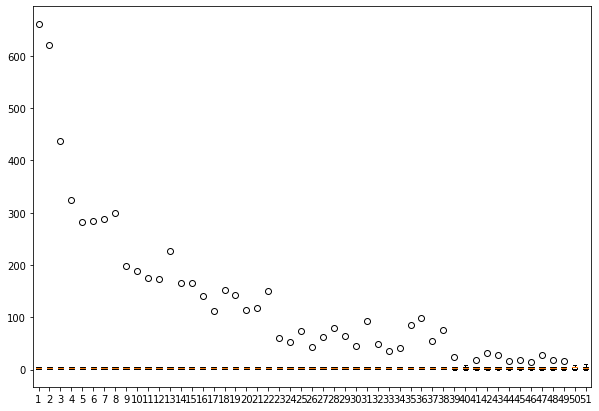

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(ratings_by_state.transpose())
plt.show()
plt.clf()

In [ ]:
df_by_state = df.groupby(["state"]).mean().sort_values(by="five star", ascending=False)
df_by_state_describe = df_by_state.describe() # .transpose()
display(df_by_state_describe)

,five star,# of dialysis stations,percentage of medicare patients with hgb<10 g/dl,percentage of medicare patients with hgb>12 g/dl,number of dialysis patients with hgb data,number of patients included in the transfusion summary,percent of adult hd patients with kt/v >= 1.2,percentage of adult pd pts with kt/v >= 1.7,percentage of pediatric hd patients with kt/v >= 1.2,number of adult hd patients with kt/v data,...,number of patient-months in npcr summary,percentage of pediatric hd patients with npcr,95% c.i. (upper limit) for swr,95% c.i. (lower limit) for swr,number of patients in this facility for swr,standardized first kidney transplant waitlist ratio,95% c.i. (upper limit) for pppw,95% c.i. (lower limit) for pppw,number of patients for pppw,percentage of prevalent patients waitlisted
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,11.000000,51.000000,...,48.000000,20.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,3.937338,16.553165,20.537922,0.324798,27.228452,37.105670,96.790009,92.337120,91.848485,62.463990,...,30.568515,91.791667,2.787300,0.341200,28.533405,1.041973,45.237183,5.586440,62.016535,16.700793
std,0.398767,2.732683,3.548940,0.306290,6.396503,8.158903,1.488956,3.601336,10.984194,14.971469,...,26.663476,13.770346,0.659595,0.191908,6.248647,0.409756,7.082448,3.471330,14.578412,6.311809
min,2.750000,10.750000,12.500000,0.000000,15.448980,21.816265,89.045872,76.400000,61.000000,38.923077,...,1.000000,49.000000,1.643750,0.108378,15.974359,0.466216,31.479545,1.645455,41.300000,7.151136
25%,3.728261,14.976657,18.350769,0.138996,22.832653,32.118217,96.542419,91.267857,90.000000,52.538186,...,11.375000,91.750000,2.436341,0.203002,24.453102,0.772693,40.801605,3.274056,52.567876,12.815971
50%,3.906780,16.385542,20.250000,0.241071,26.250000,35.289100,97.127389,93.064516,95.000000,58.732432,...,26.400000,96.500000,2.623971,0.298776,27.722222,0.950000,44.317647,4.770690,59.492462,15.462069
75%,4.226111,18.070142,22.292265,0.388322,32.060000,43.544530,97.595861,94.490964,98.500000,70.935662,...,35.687500,99.000000,3.116048,0.413205,32.919603,1.206239,49.784105,6.993753,68.091830,20.240823
max,4.777778,24.324324,34.083333,1.571429,42.111111,63.777778,98.625000,96.600000,100.000000,116.027027,...,114.000000,100.000000,4.975000,0.981667,45.675676,2.398333,63.979268,20.718293,115.243243,40.360976


In [ ]:
df_by_state_mortality = df_by_state[["five star", "mortality rate (facility)",
                                    "mortality rate: upper confidence limit (97.5%)", 
                                    "mortality rate: lower confidence limit (2.5%)"]]

df_by_state_mortality.head()

,five star,mortality rate (facility),mortality rate: upper confidence limit (97.5%),mortality rate: lower confidence limit (2.5%)
state,,,,
ALASKA,4.777778,18.922222,30.966667,10.977778
COLORADO,4.657534,19.665385,32.706410,11.442308
UTAH,4.627907,22.531915,38.863830,12.310638
KANSAS,4.611111,21.714035,35.005263,13.007018
MAINE,4.473684,19.005000,30.070000,11.725000


In [ ]:
"""fig = plt.figure(figsize =(10, 7))
plt.scatter(df_by_state_mortality.iloc[:, [1]].values.tolist(), df_by_state_mortality.iloc[:, [0]].values.tolist())
display(df_by_state_mortality.iloc[:, 0:2].sort_values(by="mortality rate (facility)", ascending=False).head(10))
plt.show()
plt.clf()"""

'fig = plt.figure(figsize =(10, 7))\nplt.scatter(df_by_state_mortality.iloc[:, [1]].values.tolist(), df_by_state_mortality.iloc[:, [0]].values.tolist())\ndisplay(df_by_state_mortality.iloc[:, 0:2].sort_values(by="mortality rate (facility)", ascending=False).head(10))\nplt.show()\nplt.clf()'

In [ ]:
"""fig = plt.figure(figsize =(10, 7))
plt.scatter(df_by_state["percentage of medicare patients with hgb<10 g/dl"].values.tolist(), df_by_state["five star"].values.tolist())
display(df_by_state[["percentage of medicare patients with hgb<10 g/dl", "five star"]].sort_values(
    by="percentage of medicare patients with hgb<10 g/dl", ascending=False).head())
plt.show()
plt.clf()"""

'fig = plt.figure(figsize =(10, 7))\nplt.scatter(df_by_state["percentage of medicare patients with hgb<10 g/dl"].values.tolist(), df_by_state["five star"].values.tolist())\ndisplay(df_by_state[["percentage of medicare patients with hgb<10 g/dl", "five star"]].sort_values(\n    by="percentage of medicare patients with hgb<10 g/dl", ascending=False).head())\nplt.show()\nplt.clf()'

In [ ]:
"""fig = plt.figure(figsize =(10, 7))
plt.scatter(df["percentage of medicare patients with hgb>12 g/dl"].values.tolist(), df["five star"].values.tolist())
display(df[["percentage of medicare patients with hgb>12 g/dl", "five star"]].sort_values(
    by="percentage of medicare patients with hgb>12 g/dl", ascending=False).head())
plt.show()
plt.clf()"""

'fig = plt.figure(figsize =(10, 7))\nplt.scatter(df["percentage of medicare patients with hgb>12 g/dl"].values.tolist(), df["five star"].values.tolist())\ndisplay(df[["percentage of medicare patients with hgb>12 g/dl", "five star"]].sort_values(\n    by="percentage of medicare patients with hgb>12 g/dl", ascending=False).head())\nplt.show()\nplt.clf()'

In [ ]:
df_by_state_filtered = df_by_state[['five star', 'percentage of medicare patients with hgb<10 g/dl', 'percentage of medicare patients with hgb>12 g/dl',
            'percent of adult hd patients with kt/v >= 1.2', 'percentage of adult pd pts with kt/v >= 1.7',
            'percentage of adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dl)',
            'percentage of adult patients with serum phosphorus less than 3.5 mg/dl',
            #'percentage of adult patients with serum phosphorus between 3.5-4.5 mg/dl',
            #'percentage of adult patients with serum phosphorus between 4.6-5.5 mg/dl',
            #'percentage of adult patients with serum phosphorus between 5.6-7.0 mg/dl',
            'percentage of adult patients with serum phosphorus greater than 7.0 mg/dl',
            'hospitalization rate (facility)','standard infection ratio', 'transfusion rate (facility)']]

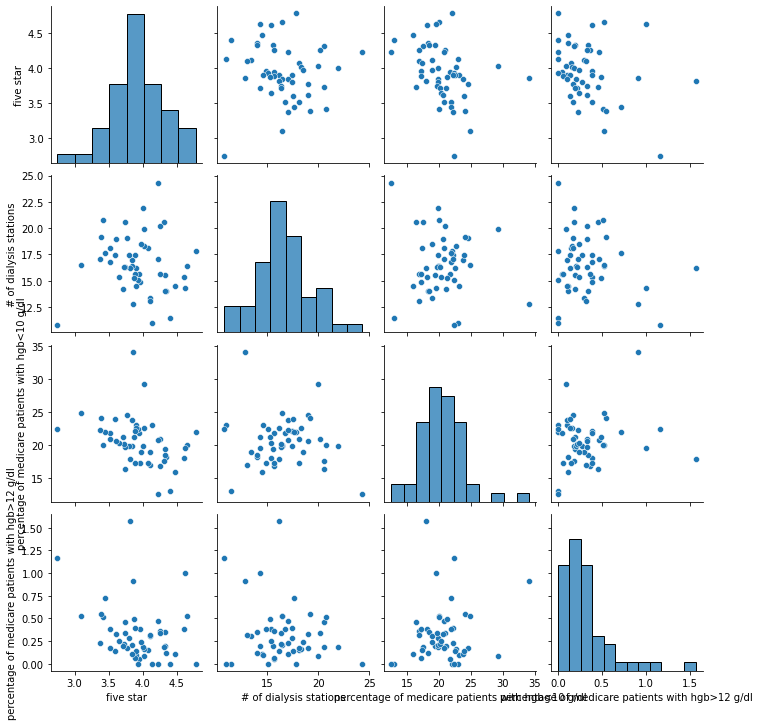

In [ ]:
sns.pairplot(df_by_state.iloc[:,0:4])